In [1]:
#Alleen Voor Wiebe
import sys
sys.path.append("c:\\users\\wiebe\\appdata\\local\\programs\\python\\python38\\lib\\site-packages") # go to parent dir
#ALLEEN voor Wiebe
import city_class_test
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from itertools import chain
from numba import jit,prange


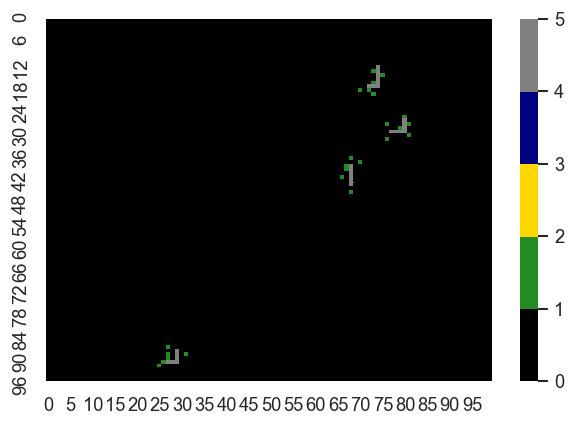

In [2]:
def plot_grid(city):
    cmap = sns.color_palette(["black", "forestgreen", "gold", "navy", "grey"])
    activity_grid = np.array([obj.value for row in city.grid for obj in row]).reshape(city.n,city.n)
    fig = plt.figure(dpi=120)
    sns.heatmap(activity_grid, cmap=cmap)
    plt.show()
#         fig.savefig(\"first_model_t={}.jpg\".format((i+1)*10))
np.random.seed(90)
city = city_class_test.City(n=100)
plot_grid(city)

In [3]:
def time(city):
    for i in range(5):
        for _ in range(10):
            city.step()
        plot_grid(city)

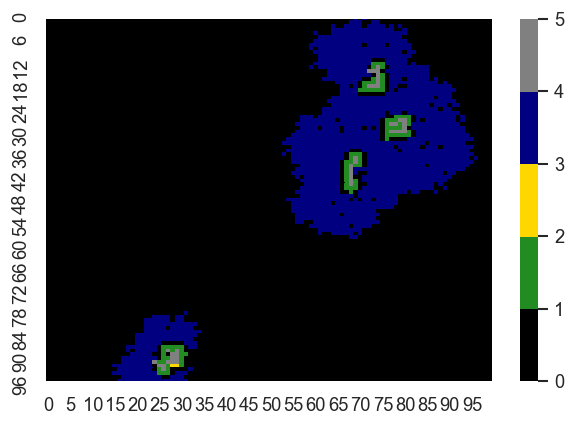

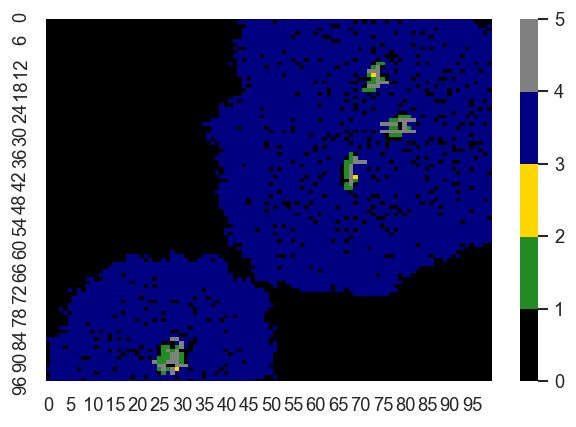

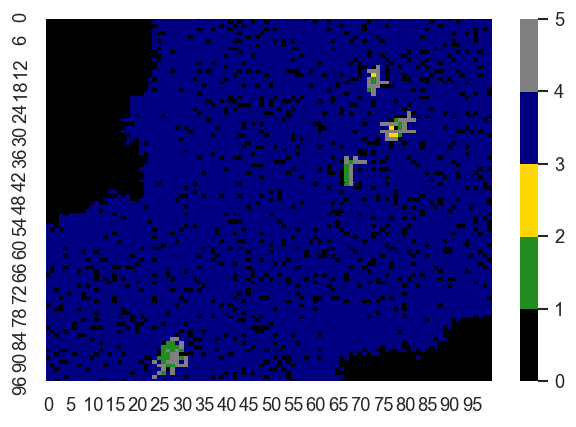

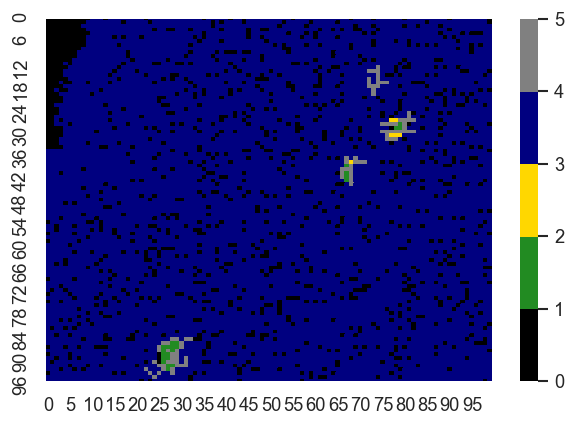

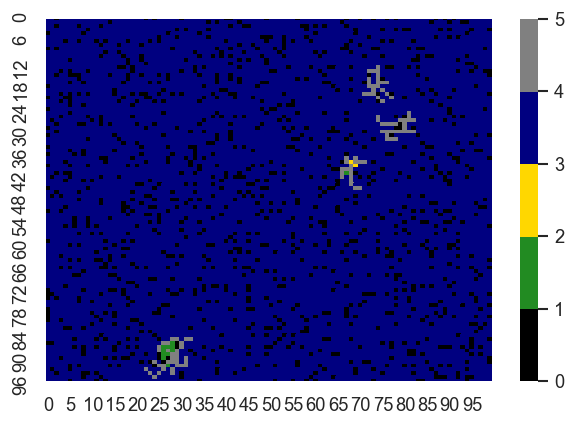

In [4]:
time(city)

[47, 73, 90, 97, 98, 97, 92, 91, 89, 90, 84, 81, 82, 78, 74, 74, 68, 63, 58, 52, 50, 50, 45, 43, 38, 39, 38, 39, 36, 33, 30, 29, 25, 24, 22, 22, 23, 22, 23, 23, 21, 21, 21, 21, 23, 21, 20, 16, 16, 11]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 2, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 6, 6, 5, 6, 6, 6, 5, 3, 2, 2, 2, 3, 3, 2]
[1, 10, 29, 82, 192, 384, 632, 944, 1245, 1569, 1906, 2238, 2585, 2937, 3295, 3624, 3951, 4294, 4671, 5013, 5349, 5607, 5893, 6189, 6404, 6635, 6745, 7033, 7228, 7382, 7607, 7754, 7893, 8009, 8172, 8293, 8357, 8457, 8537, 8628, 8603, 8640, 8672, 8677, 8668, 8723, 8680, 8725, 8693, 8717]
[]


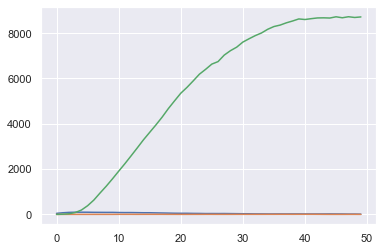

In [5]:
for activity in city.activities:
    print(activity)
    plt.plot(activity)

In [6]:
# city.plot_growth()

street_thresholds = []
for h in np.linspace(0.1, 1, 10):
    street_threshold={'housing':h, 'industry':0.6, 'stores':0.7}
    street_thresholds.append(street_threshold)
r = city_class_test.Runner('street_thresholds', street_thresholds)
r.run_experiment()

TypeError: type object argument after ** must be a mapping, not str

In [ ]:
r.plot()


In [ ]:
r.plot_grid(0)
r.plot_grid(5)
r.plot_grid(9)